<html>
    <summary></summary>
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;">
              <h1>
               <left>Stoichiometries, Propensities, and ODE Models</left>
              </h1>
              <p><left>============================================================================</left> </p>
<pre>Course: ASU CBP Summer School 2025
Instructor: Dr. Pedro Pessoa, Carol Lu
Contact Info: douglas.shepherd@asu.edu
Authors: Dr. Michael May, Joshua Cook, Dr. Brian Munsky, Dr. Douglas Shepherd
</pre>
         </div>
    </p>

</html>

<details>
  <summary>Copyright info</summary>

```
Copyright 2024 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>



<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/M3A_Stoichiometries_Propensities_and_ODE_Models.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/M3A_Stoichiometries_Propensities_and_ODE_Models.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
figSize=800

---
# *Learning Objectives*

---
Stoichiometries and Propensities can be used to model temporal dynamics using coupled ODEs.

After this workbook students should be able to:
* Describe the meaning and use of **Stoichiometry Vectors** and **Propensity Functions**.
* Draw simple cartoons to represent biochemical reactions and define Stoichiometry Vectors .
* Derive the functional form of propensity functions using the **Law of Mass Action**.
* Write python codes to compute propensity functions from rate constants and chemical system states.
* Define and solve for the mean field solution (dx/dt rate equation) using know stoichiometry vectors and propensity functions.
* Describe and computationally analyze how parameters and reaction orders influence the **steady-state** or **quasi-steady state equilibria**
* Describe and make **phase-space diagrams** and **quiver plots** to illustrate chemical process dynamics.

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide2.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide3.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide4.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide5.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide6.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide7.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/image-1.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide9.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide10.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide11.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide13.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide14.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide15.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide18.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide19.png?raw=1)

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide20.png?raw=1)

# Examples In Python

---
# **Problem 1: Birth-Decay Process for Protein Synthesis**
---

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide27.png?raw=1)

**Problem 1**: A Simple Model of Consititutive Gene Expression.

*Step 1* Define the State of the model and specify the initial conditions.

In [2]:
# Here we have a single species (N=1) that starts at x0 = 10 mg/mL
x0=np.array([10])

*Step 2* Determine how many reactions there are -- just two (M=2) in this case.

*Step 3* Determine the stoichiometry matrix:

In [3]:
# Define the stoichiometry matrix as a 1 (species) by 2 (reaction) numpy array,
S=np.array([1,-1])

*Step 4* Define the propensity functions.

Using the parameters t0=0, k1=0.8, and k2 = 0.02, define the propensity as a function of time and state W(x,t). W(x,t) should return a M=2 by 1 numpy vector describing the rate of production in the first term and the rate of decay in the second term.

In [4]:
# Define the reaction rate parameters as a dictionary
pars = {'k1': 0.8*5., 'k2': 0.02*5.}
# Units are:  k1 = (mg/mL) / minute
#             k2 = 1 / minute

# Define the reaction rate (propensity) functions
def W(x,t,pars=pars):
  return np.array([pars['k1'],pars['k2']*x[0]]) #######Replace with correct answer#######

*Step 5* Formulate the Right Hand Side of the ODE: dx/dt = S*W(x,t)

In [5]:
# Define the RHS of the ODE:
def dxdt(x,t,pars=pars):
  return S @ W(x,t,pars=pars)

*Stpe 6* Slve the initial value problem.

Use `odeint` to numerically solve the differenetial equation given by: dx/dt = S * w(t,x), with an intial time of 0, final time of 200 using the same k1 and k2 above. Make a plot of x[0] over time. Use an initial condition of x=[0].

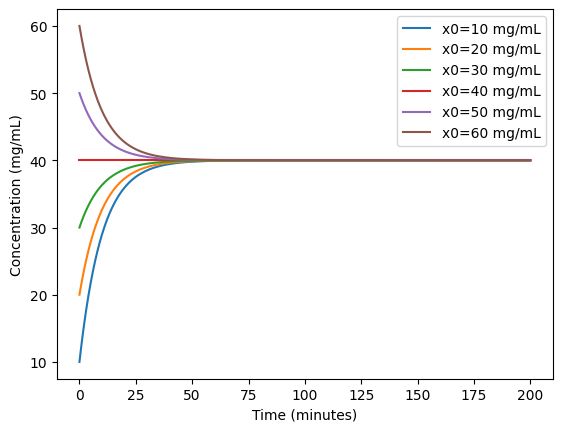

In [6]:
# Define the integration time span
timeSpan=np.linspace(0,200,201)

for x0 in [10,20,30,40,50,60]:
  # Integrate the ODE for different initial conditions
  trajectory=odeint(dxdt,np.array(x0),timeSpan)

  # Plot the results
  plt.plot(timeSpan,trajectory,label=f'x0={x0} mg/mL')

plt.xlabel('Time (minutes)')
plt.ylabel('Concentration (mg/mL)')
plt.legend()

# Example 2 - "Bursting" Gene Expression
![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide29.png?raw=1)

In [7]:
# Step 1: The number of species is 3:  'OFF', 'ON', 'Protein'
#         The initial conditions are:  x0 = [1, 0, 0]
#         The initial condition corresponds to 1 molecule of 'OFF' and 0 molecules of 'ON' and 'Protein'
#         The initial condition is defined as a 3 x 1 numpy array:
x0 = np.array([1, 0, 0])

# Step 2: The number of reactions is 4:
#         R1:  OFF -> ON
#         R2:  ON -> OFF
#         R3:  ON -> ON + Protein
#         R4:  Protein -> null

# Step 3: The stoichiometry matrix is a 3 x 4 matrix:
#         Rows correspond to species and columns correspond to reactions.
#         The matrix is defined as follows:
S = [[-1, 1, 0, 0],
        [1, -1, 0, 0],
        [0, 0, 1, -1]]

# Step 4: Define the reaction rate parameters as a dictionary
pars = {'kon': 0.2, 'koff': 0.5, 'kP': 10, 'gam': 0.1}
def W(x,t,pars=pars):
  return np.array([pars['kon']*x[0],
                   pars['koff']*x[1],
                   pars['kP']*x[1],
                   pars['gam']*x[2]])

# Step 5: Define the RHS of the ODE:
def dxdt(x,t,pars=pars):
  return (S @ W(x,t,pars=pars)).flatten()

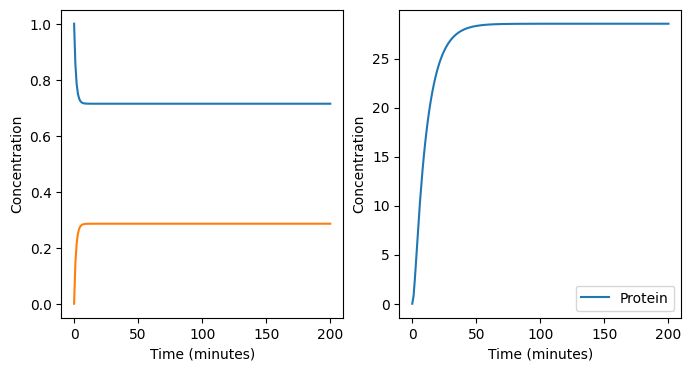

In [8]:
# Step 6: Solve the initial value problem.
# Define the integration time span
timeSpan=np.linspace(0,200,201)

# Integrate the ODE for different initial conditions
trajectory=odeint(dxdt,x0,timeSpan)

# Plot the results with the first two species in the same plot and the third species in a separate plot
fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].plot(timeSpan,trajectory[:,0],label='OFF')
ax[0].plot(timeSpan,trajectory[:,1],label='ON')
ax[0].set_xlabel('Time (minutes)')
ax[0].set_ylabel('Concentration')

ax[1].plot(timeSpan,trajectory[:,2],label='Protein')
ax[1].set_xlabel('Time (minutes)')
ax[1].set_ylabel('Concentration')
plt.legend()
plt.show()


---

# **Problem 2: Quasi-SteadyState Analysis of Michaelis-Menten Dynamics**

Michaelis-Menten dyanamics can be analysed using two different methods, the full system using the Law of Mass Action, and simplfied system using the Quasi-Steady state assumption. But as we will see, this is only accurate under certain paramter combinations.

## Part 1.  Enzyme-substrate reactions using the full LMA.
![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide23.png?raw=1)

In [9]:
# Step 1: The number of species is 4: 'E', 'S', 'ES', 'P'
#         The initial conditions are:  x0 = [100, 1000, 0, 0]
#         The initial condition corresponds to 100 molecules of 'E' and 'S' and 0 molecules of 'ES' and 'P'
#         The initial condition is defined as a 4 x 1 numpy array:
x0 = np.array([100, 1000, 0, 0])

# Step 2: The number of reactions is 4:
#         R1:  E + S -> ES
#         R2:  ES -> E + S
#         R3:  ES -> E + P
#         R4:  P -> null

# Step 3: The stoichiometry matrix is a 4 x 4 matrix:
#         Rows correspond to species and columns correspond to reactions.
#         The matrix is defined as follows:
S = [   [-1, 1, 1, 0],
        [-1, 1, 0, 0],
        [1, -1, -1, 0],
        [0, 0, 1, -1]]

# Step 4: Define the reaction rate parameters as a dictionary
pars = {'k1': 0.01, 'k2': 0.5, 'k3': 0.05, 'k4': 0.01}
def W(x,t,pars=pars):
  return np.array([pars['k1']*x[0]*x[1],
                   pars['k2']*x[2],
                   pars['k3']*x[2],
                   pars['k4']*x[3]])

# Step 5: Define the RHS of the ODE:
def dxdt(x,t,pars=pars):
  return (S @ W(x,t,pars=pars)).flatten()

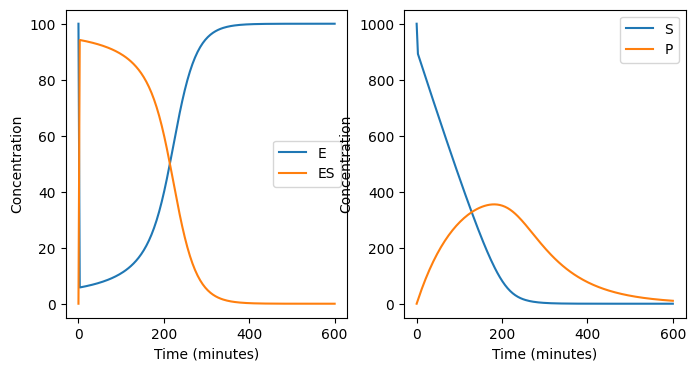

In [10]:
# Step 6: Solve the initial value problem.
# Define the integration time span
timeSpan=np.linspace(0,600,201)

# integrate the ODE starting at the initial conditions
trajectory=odeint(dxdt,np.array([100,1000,0,0]),timeSpan)

# Plot the results
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(timeSpan,trajectory[:,0],label='E')
ax[0].plot(timeSpan,trajectory[:,2],label='ES')
ax[0].set_xlabel('Time (minutes)')
ax[0].set_ylabel('Concentration')
ax[0].legend()

ax[1].plot(timeSpan,trajectory[:,1],label='S')
ax[1].plot(timeSpan,trajectory[:,3],label='P')
ax[1].set_xlabel('Time (minutes)')
ax[1].set_ylabel('Concentration')
ax[1].legend()
plt.show()

## Example 3.  Enzyme-substrate reactions using the Michaelis-Menten Quasi-Steady State Assumption

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide24A.png?raw=1)

In [11]:
# Step 1: The number of species is 2: 'S', 'P'
#         The initial conditions are:  y0 = [1000, 0]
#         The initial condition corresponds to 100 molecules of 'E' and 'S' and 0 molecules of 'ES' and 'P'
#         The initial condition is defined as a 4 x 1 numpy array:
y0 = np.array([x0[1],x0[3]])

# Step 2: The number of reactions is 2:
#         R1:  S -> P
#         R2:  P -> null

# Step 3: The stoichiometry matrix is a 2 x 2 matrix:
#         Rows correspond to species and columns correspond to reactions.
#         The matrix is defined as follows:
Sy = [   [-1, 0],
        [1, -1]]

# Step 4: Tjhe parameters are the same as before, but the reaction rates are different
def Wy(y,t,pars=pars):
  return np.array([pars['k3']*pars['k1']*x0[0]*y[0]/(pars['k1']*y[0]+pars['k2']),
                     pars['k4']*y[1]])

# Step 5: Define the RHS of the ODE:
def dydt(y,t,pars=pars):
  return (Sy @ Wy(y,t,pars=pars)).flatten()

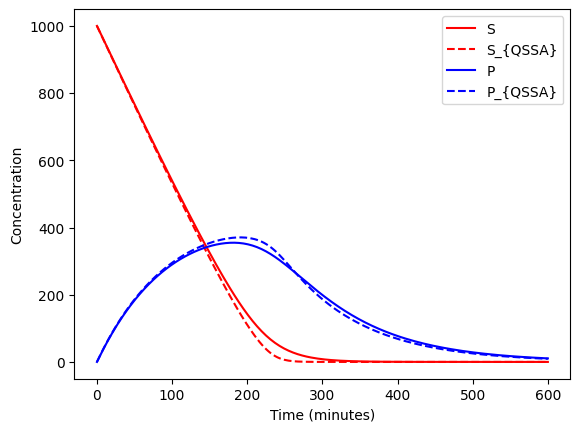

In [12]:
# Step 6: Solve the initial value problem.
# integrate the ODE starting at the initial conditions
new_trajectory=odeint(dydt,y0,timeSpan)

# Plot the results and compare with the previous results
plt.plot(timeSpan,trajectory[:,1]+trajectory[:,2],label='S',color='red',linestyle='-')
plt.plot(timeSpan,new_trajectory[:,0],label='S_{QSSA}',color='red',linestyle='--')
plt.plot(timeSpan,trajectory[:,3],label='P',color='blue',linestyle='-')
plt.plot(timeSpan,new_trajectory[:,1],label='P_{QSSA}',color='blue',linestyle='--')

plt.xlabel('Time (minutes)')
plt.ylabel('Concentration')
plt.legend()
plt.show()


---

# **Example 4: LacI-Lambda-cl Toggle Switch Bifurcation**

Toggle stiches are a system in which the system can toggle between two different stable points. A plasmid can be used to make a LacI and Lambda-cl repress each other. When one becomes highly expressed, it will inhibit the production of the other one, but this dynamic can be reversed, creating a toggle that changes depending on the initial state of the system. Analysing the dynamics of this system will be better understood in "phase space".

![alt text](https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module3-ModelingBiochemicalReactions/Figures/StoichiometryAndPropensity_2023/Slide32a.png?raw=1)

In [13]:
# Step 1: The number of species is 2: 'LacI', 'LambdaCI'
#         The initial conditions are:  x0 = [10, 100]
#         The initial condition corresponds to 10 molecules of 'LacI' and 100 of 'LambdaCI'
#         The initial condition is defined as a 2 x 1 numpy array:
x0 = np.array([10, 100])

# Step 2: The number of reactions is 4:
#         R1:  null -> LacI
#         R2:  null -> LambdaCI
#         R3:  LacI -> null
#         R4:  LambdaCI -> null

# Step 3: The stoichiometry matrix is a 2 x 4 matrix:
#         Rows correspond to species and columns correspond to reactions.
#         The matrix is defined as follows:
S = [   [1, 0, -1, 0],
        [0, 1, 0, -1]]

# Step 4: Define the reaction rate parameters as a dictionary
pars = {'k11': 0.02, 'k12': 1.2, 'a1': 10, 'eta1': 2, 'gamma1':0.02,
        'k21': 0.02, 'k22': 1.2, 'a2': 10, 'eta2': 2, 'gamma2':0.02}
def W(x,t,pars=pars):
  return np.array([ pars['k11'] + pars['k12']/(1+(x[1]/pars['a1'])**pars['eta1']),
                    pars['k21'] + pars['k22']/(1+(x[0]/pars['a2'])**pars['eta2']),
                    pars['gamma1']*x[0],
                    pars['gamma2']*x[1]])

# Step 5: Define the RHS of the ODE:
def dxdt(x,t,pars=pars):
  return (S @ W(x,t,pars=pars)).flatten()

**Phase Plots**

Let's make a vector field of dxdt(x,t) over a grid of points from 0 to 40 in x1 and x2.
We will plot the vector field using the _plt.quiver_ function.

In [14]:
# Create a grid of points in X and Y
xRange=np.arange(0,70,2)
yRange=np.arange(0,70,2)
[X,Y]=np.meshgrid(xRange,yRange)

# Compute the rate of change at each point in the grid
dx1dt=np.zeros([len(xRange),len(yRange)])
dx2dt=np.zeros([len(xRange),len(yRange)])
for i in range(len(xRange)):
  for j in range(len(yRange)):
    rate=dxdt([xRange[i],yRange[j]],0)
    dx1dt[i,j]=rate[0]
    dx2dt[i,j]=rate[1]

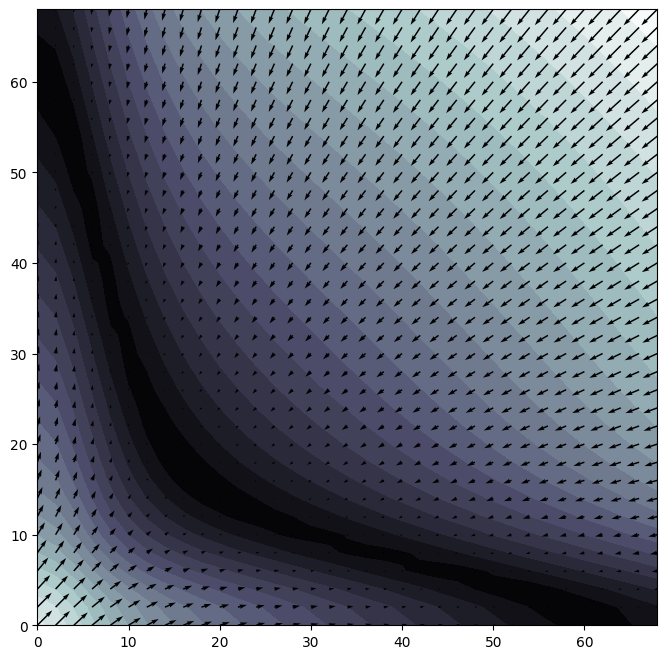

In [15]:
# Make a controur plot showing the rate of change at each point in the grid
# On top of that show a quiver plot for the resulting vectors.
fig, ax = plt.subplots(figsize =(8, 8))
ax.contourf(X,Y,np.sqrt(dx1dt**2+dx2dt**2),levels=20, cmap='bone')
ax.quiver(X,Y,dx2dt,dx1dt)

*Step 6* Integrate to solve the initial value problem

In [16]:
# Here we will solve for the trajectories starting from multiple initial conditions
initialStates=[np.array([10,65]),np.array([20,65]),np.array([30,65]),np.array([40,60]),
              np.array([50,50]),np.array([60,40]),np.array([65,30]),np.array([65,20]),np.array([65,10]),
              np.array([0,0]),np.array([0,10]),np.array([10,0]),np.array([20,0]),np.array([0,20])]

# Define the integration time span
timeSpan=np.linspace(0,800,2001)

# Iterate over the initial conditions and solve the ODE
toggleTrajectories = []
for x0 in initialStates:
  toggleTrajectories.append(odeint(dxdt,x0,timeSpan))

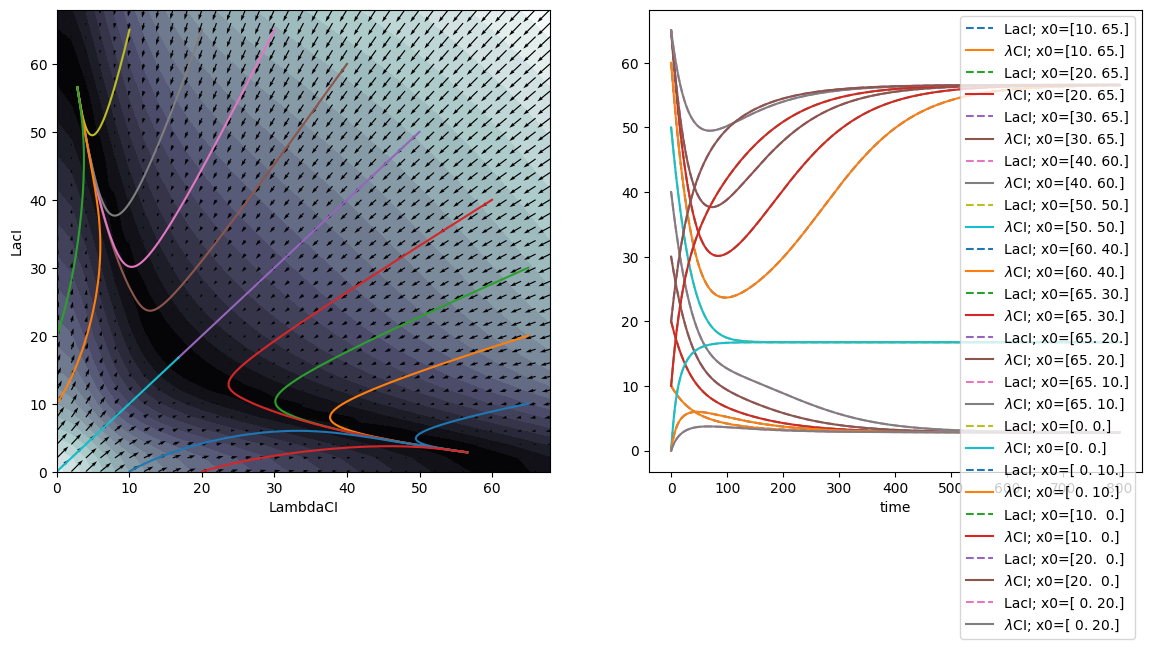

In [17]:
fig, ax = plt.subplots(1,2, figsize =(14,6))
ax[0].contourf(X,Y,np.sqrt(dx1dt**2+dx2dt**2),levels=20, cmap='bone')
ax[0].quiver(X,Y,dx2dt,dx1dt)

# Add the trajectorties over top.
for trajectory in toggleTrajectories:
  ax[0].plot(trajectory[:,1],trajectory[:,0])
  ax[1].plot(timeSpan,trajectory[:,0],'--', label=f'LacI; x0={trajectory[0,:]}')
  ax[1].plot(timeSpan,trajectory[:,0],'-', label=f'$\lambda$CI; x0={trajectory[0,:]}')


ax[0].set_xlabel('LambdaCI')
ax[0].set_ylabel('LacI')
ax[1].set_xlabel('time')
ax[1].legend()
plt.show()



# Adding Time-Varying Inputs

For many biological problems we are interested in how cells respond to environmental stimuli (e.g., drugs or changes in nutrients).

All of the analyese above are very easilly changed to allow for such circumstances.  

To see this, let's look again at the toggle switch but now in a situation where the degradation depends on an external control signal.

In [18]:
def u(t):
  return 0.01*(t>250)

def Wcontrol(x,t,pars=pars):
  return np.array([ pars['k11'] + pars['k12']/(1+(x[1]/pars['a1'])**pars['eta1']),
                    pars['k21'] + pars['k22']/(1+(x[0]/pars['a2'])**pars['eta2']),
                    (pars['gamma1']+u(t))*x[0],
                    pars['gamma2']*x[1]])

# Step 5: Define the RHS of the ODE:
def dxdtControl(x,t,pars=pars):
  return (S @ Wcontrol(x,t,pars=pars)).flatten()

In [19]:
# Iterate over the initial conditions and solve the ODE
toggleTrajectoriesControl = []
for x0 in initialStates:
  toggleTrajectoriesControl.append(odeint(dxdtControl,x0,timeSpan))

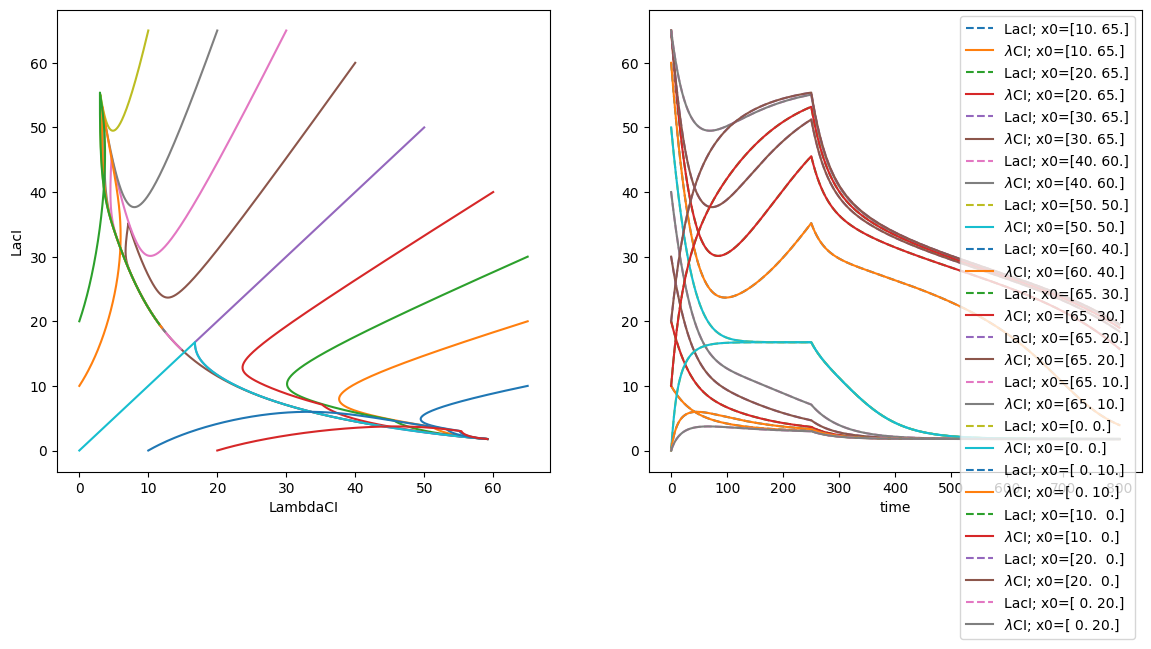

In [20]:
fig, ax = plt.subplots(1,2, figsize =(14,6))

# Add the trajectorties over top.
for trajectory in toggleTrajectoriesControl:
  ax[0].plot(trajectory[:,1],trajectory[:,0])
  ax[1].plot(timeSpan,trajectory[:,0],'--', label=f'LacI; x0={trajectory[0,:]}')
  ax[1].plot(timeSpan,trajectory[:,0],'-', label=f'$\lambda$CI; x0={trajectory[0,:]}')

ax[0].set_xlabel('LambdaCI')
ax[0].set_ylabel('LacI')
ax[1].set_xlabel('time')
ax[1].legend()
plt.show()

# Try playing with the time and level of the input signal to see what interesting behaviours you can get.